# PWI

In [19]:
import mne
import os

# Directorio donde se encuentran los archivos EEG
directorio_datos = r"C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms"

# Diccionario para almacenar los registros EEG por condición
registros_eeg = {"congruente": {}, "incongruente_rel": {}, "incongruente_no_rel": {}}

# Condiciones y sus sufijos de archivo correspondientes
condiciones = {
    "congruente": "PWI_CON",
    "incongruente_rel": "PWI_INC_REL",
    "incongruente_no_rel": "PWI_INC_UNREL"
}

# Sujetos a excluir de la carga de archivos, pero deben aparecer en el diccionario
sujetos_excluir = {11, 30}

# Iterar sobre los 40 sujetos para cada condición
for sujeto_id in range(1, 41):
    for condicion, sufijo_archivo in condiciones.items():
        sujeto_key = f"Sujeto_{sujeto_id}"

        if sujeto_id in sujetos_excluir:
            registros_eeg[condicion][sujeto_key] = None
            print(f"{sujeto_key} excluido de la carga en '{condicion}', asignado como None.")
            continue  # Saltar a la siguiente condición

        nombre_archivo = f"S{sujeto_id}_{sufijo_archivo}.set"
        ruta_archivo = os.path.join(directorio_datos, nombre_archivo)

        try:
            # Cargar el archivo .set como un registro continuo
            registro_continuo = mne.io.read_raw_eeglab(ruta_archivo)
            registros_eeg[condicion][sujeto_key] = registro_continuo
            print(f"{nombre_archivo} cargado exitosamente en '{condicion}'.")
        except FileNotFoundError:
            registros_eeg[condicion][sujeto_key] = None
            print(f"{nombre_archivo} no encontrado en '{condicion}'.")
        except Exception as e:
            registros_eeg[condicion][sujeto_key] = None
            print(f"Error al cargar {nombre_archivo} en '{condicion}': {e}")

# Resumen de la carga de archivos
# print("\nResumen de las cargas:")
# for condicion, sujetos in registros_eeg.items():
#     print(f"\nCondición: {condicion}")
#     for sujeto, datos in sujetos.items():
#         estado = "Cargado" if datos is not None else "No cargado"
#         print(f"  {sujeto}: {estado}")


Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S1_PWI_CON.fdt
S1_PWI_CON.set cargado exitosamente en 'congruente'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S1_PWI_INC_REL.fdt
S1_PWI_INC_REL.set cargado exitosamente en 'incongruente_rel'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S1_PWI_INC_UNREL.fdt
S1_PWI_INC_UNREL.set cargado exitosamente en 'incongruente_no_rel'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S2_PWI_CON.fdt
S2_PWI_CON.set cargado exitosamente en 'congruente'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\Set_Average_por_Sujeto_1000ms\S2_PWI_INC_REL.fdt
S2_PWI_INC_REL.set cargado exitosamente en 'incongruente_rel'.
Reading C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS

In [20]:
import numpy as np
import mne

def escalar_minmax_personalizado(datos, min_abs, max_abs):
    # Escalar valores entre -1 y 1 usando el máximo absoluto
    return datos / max_abs

def calcular_minmax_scaler_registros_eeg(registros_eeg):
    
    registros_eeg_minmax = {"congruente": {}, "incongruente_rel": {}, "incongruente_no_rel": {}}

    for sujeto in registros_eeg["congruente"]:  # Iterar sobre sujetos
        if registros_eeg["congruente"][sujeto] is None:
            # Si el sujeto fue excluido, mantenerlo como None en todos los casos
            for cond in registros_eeg_minmax:
                registros_eeg_minmax[cond][sujeto] = None
            continue

        # Obtener datos de la condición congruente
        datos_congruente = registros_eeg["congruente"][sujeto].get_data()  # (Canales x Tiempos)

        # Calcular máximo absoluto por canal para escalar entre -1 y 1
        max_abs_congruente = np.max(np.abs(datos_congruente), axis=1, keepdims=True)
        max_abs_congruente[max_abs_congruente == 0] = 1  # Evitar divisiones por cero

        # Normalizar todas las condiciones respecto a la condición congruente
        for condicion in registros_eeg:
            if registros_eeg[condicion][sujeto] is not None:
                datos_condicion = registros_eeg[condicion][sujeto].get_data()
                datos_escalados = datos_condicion / max_abs_congruente

                # Crear nueva instancia de RawArray con los datos normalizados
                info = registros_eeg[condicion][sujeto].info  # Mantener la metadata original
                registros_eeg_minmax[condicion][sujeto] = mne.io.RawArray(datos_escalados, info)
            else:
                registros_eeg_minmax[condicion][sujeto] = None  # Mantener sujetos sin datos

    return registros_eeg_minmax

# Aplicar el escalado a los datos cargados
registros_eeg_minmax = calcular_minmax_scaler_registros_eeg(registros_eeg)


Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.199 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=1229
    Range : 0 ... 1228 =      0.000 ...     1.

# Test estadistico por electrodo

In [ ]:
import numpy as np
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

from scipy.stats import permutation_test
import numpy as np

# Inicializar el diccionario donde se almacenarán los p-values para cada pooling
p_values = {}

# Definir las condiciones que quieres comparar
conditions = ['congruente', 'incongruente_rel', 'incongruente_no_rel']
# Definir los electrodos o áreas de interés
electrodes = registros_eeg_minmax['congruente']['Sujeto_1'].ch_names

# Recorrer los electrodos
for idx, electrode in enumerate(electrodes):
    # Inicializar el diccionario de p-values para este electrodo
    p_values[electrode] = {}

    # Recorrer las condiciones en pares para comparar
    for cond1, cond2 in [('congruente', 'incongruente_rel'),
                          ('congruente', 'incongruente_no_rel'),
                          ('incongruente_rel', 'incongruente_no_rel')]:
        
        # Listas para almacenar los datos de los sujetos para cada condición en cada muestra
        data_cond1 = []
        data_cond2 = []

        # Recorrer cada sujeto para recoger los datos de las condiciones
        for sujeto in registros_eeg_minmax[cond1].keys():
            # Verificar si los datos están disponibles para este sujeto y electrodo
            if registros_eeg_minmax[cond1][sujeto] is not None and registros_eeg_minmax[cond2][sujeto] is not None:
                data_cond1.append(registros_eeg_minmax[cond1][sujeto].get_data()[idx])
                data_cond2.append(registros_eeg_minmax[cond2][sujeto].get_data()[idx])
            else:
                print(f"Advertencia: No se encontraron datos para el sujeto {sujeto} en las condiciones {cond1} y {cond2}.")

        # Convertir las listas de datos en arrays de numpy (uno por condición)
        if data_cond1 and data_cond2:
            data_cond1 = np.array(data_cond1)  # forma (num_sujetos, num_muestras)
            data_cond2 = np.array(data_cond2)  # forma (num_sujetos, num_muestras)

            # Lista para almacenar los p-values para cada muestra en este electrodo
            p_values[electrode][f'{cond1}_vs_{cond2}'] = []

            # Realizar el test de permutación para cada muestra (columna) en los datos
            for sample_idx in range(data_cond1.shape[1]):  # Recorrer las muestras (tiempo)
                # Extraer la muestra en la posición sample_idx para ambas condiciones
                x = data_cond1[:, sample_idx]  # Valores para la condición 1
                y = data_cond2[:, sample_idx]  # Valores para la condición 2
                
                # Realizar el test de permutación entre las dos condiciones en esta muestra
                res = permutation_test((x, y), statistic, vectorized=True,
                                    n_resamples=5000  ,
                                    #alternative='greater',
                                    alternative='less',
                                    permutation_type='samples')

                # Almacenar el p-value en el diccionario
                p_values[electrode][f'{cond1}_vs_{cond2}'].append(res.pvalue)
        else:
            print(f"Advertencia: No se encontraron suficientes datos para las condiciones {cond1} y {cond2} en el electrodo {electrode}.")

# p_values contiene los p-values para cada electrodo y cada comparación de condiciones por muestra temporal


In [ ]:
# import pickle

# # Guardar p_values como p_values_greater en un archivo .pkl
# with open('results/p_values_greater.pkl', 'wb') as f:
#     pickle.dump(p_values, f)


In [ ]:
import pickle

with open('results/p_values_greater.pkl', 'rb') as f:
    p_values_greater = pickle.load(f)


In [ ]:
# with open('results/p_values_less.pkl', 'wb') as f:
#     pickle.dump(p_values, f)


In [ ]:
with open('results/p_values_less.pkl', 'rb') as f:
    p_values_less = pickle.load(f)


In [ ]:
p_values = p_values_less

In [ ]:
from statsmodels.stats.multitest import fdrcorrection

# Diccionario paralelo para almacenar los p-values corregidos
p_values_fdr = {}

for electrode in p_values:
    p_values_fdr[electrode] = {}
    for comparison in p_values[electrode]:
        raw_pvals = p_values[electrode][comparison]
        # Aplicar FDR
        _, fdr_corrected = fdrcorrection(raw_pvals, alpha=0.05)
        p_values_fdr[electrode][comparison] = fdr_corrected.tolist()


In [22]:
# import pickle

# # Guardar p_values como p_values_greater en un archivo .pkl
# with open('results/p_values_greater_FDR.pkl', 'wb') as f:
#     pickle.dump(p_values_fdr, f)


In [ ]:
import pickle

with open('results/p_values_greater_FDR.pkl', 'rb') as f:
    p_values_greater_fdr = pickle.load(f)


In [ ]:
# with open('results/p_values_less_FDR.pkl', 'wb') as f:
#     pickle.dump(p_values_fdr, f)


In [12]:
with open('results/p_values_less_FDR.pkl', 'rb') as f:
    p_values_less_fdr = pickle.load(f)


In [17]:
p_values_fdr = p_values_less_fdr

# GREATER

In [ ]:
p_values

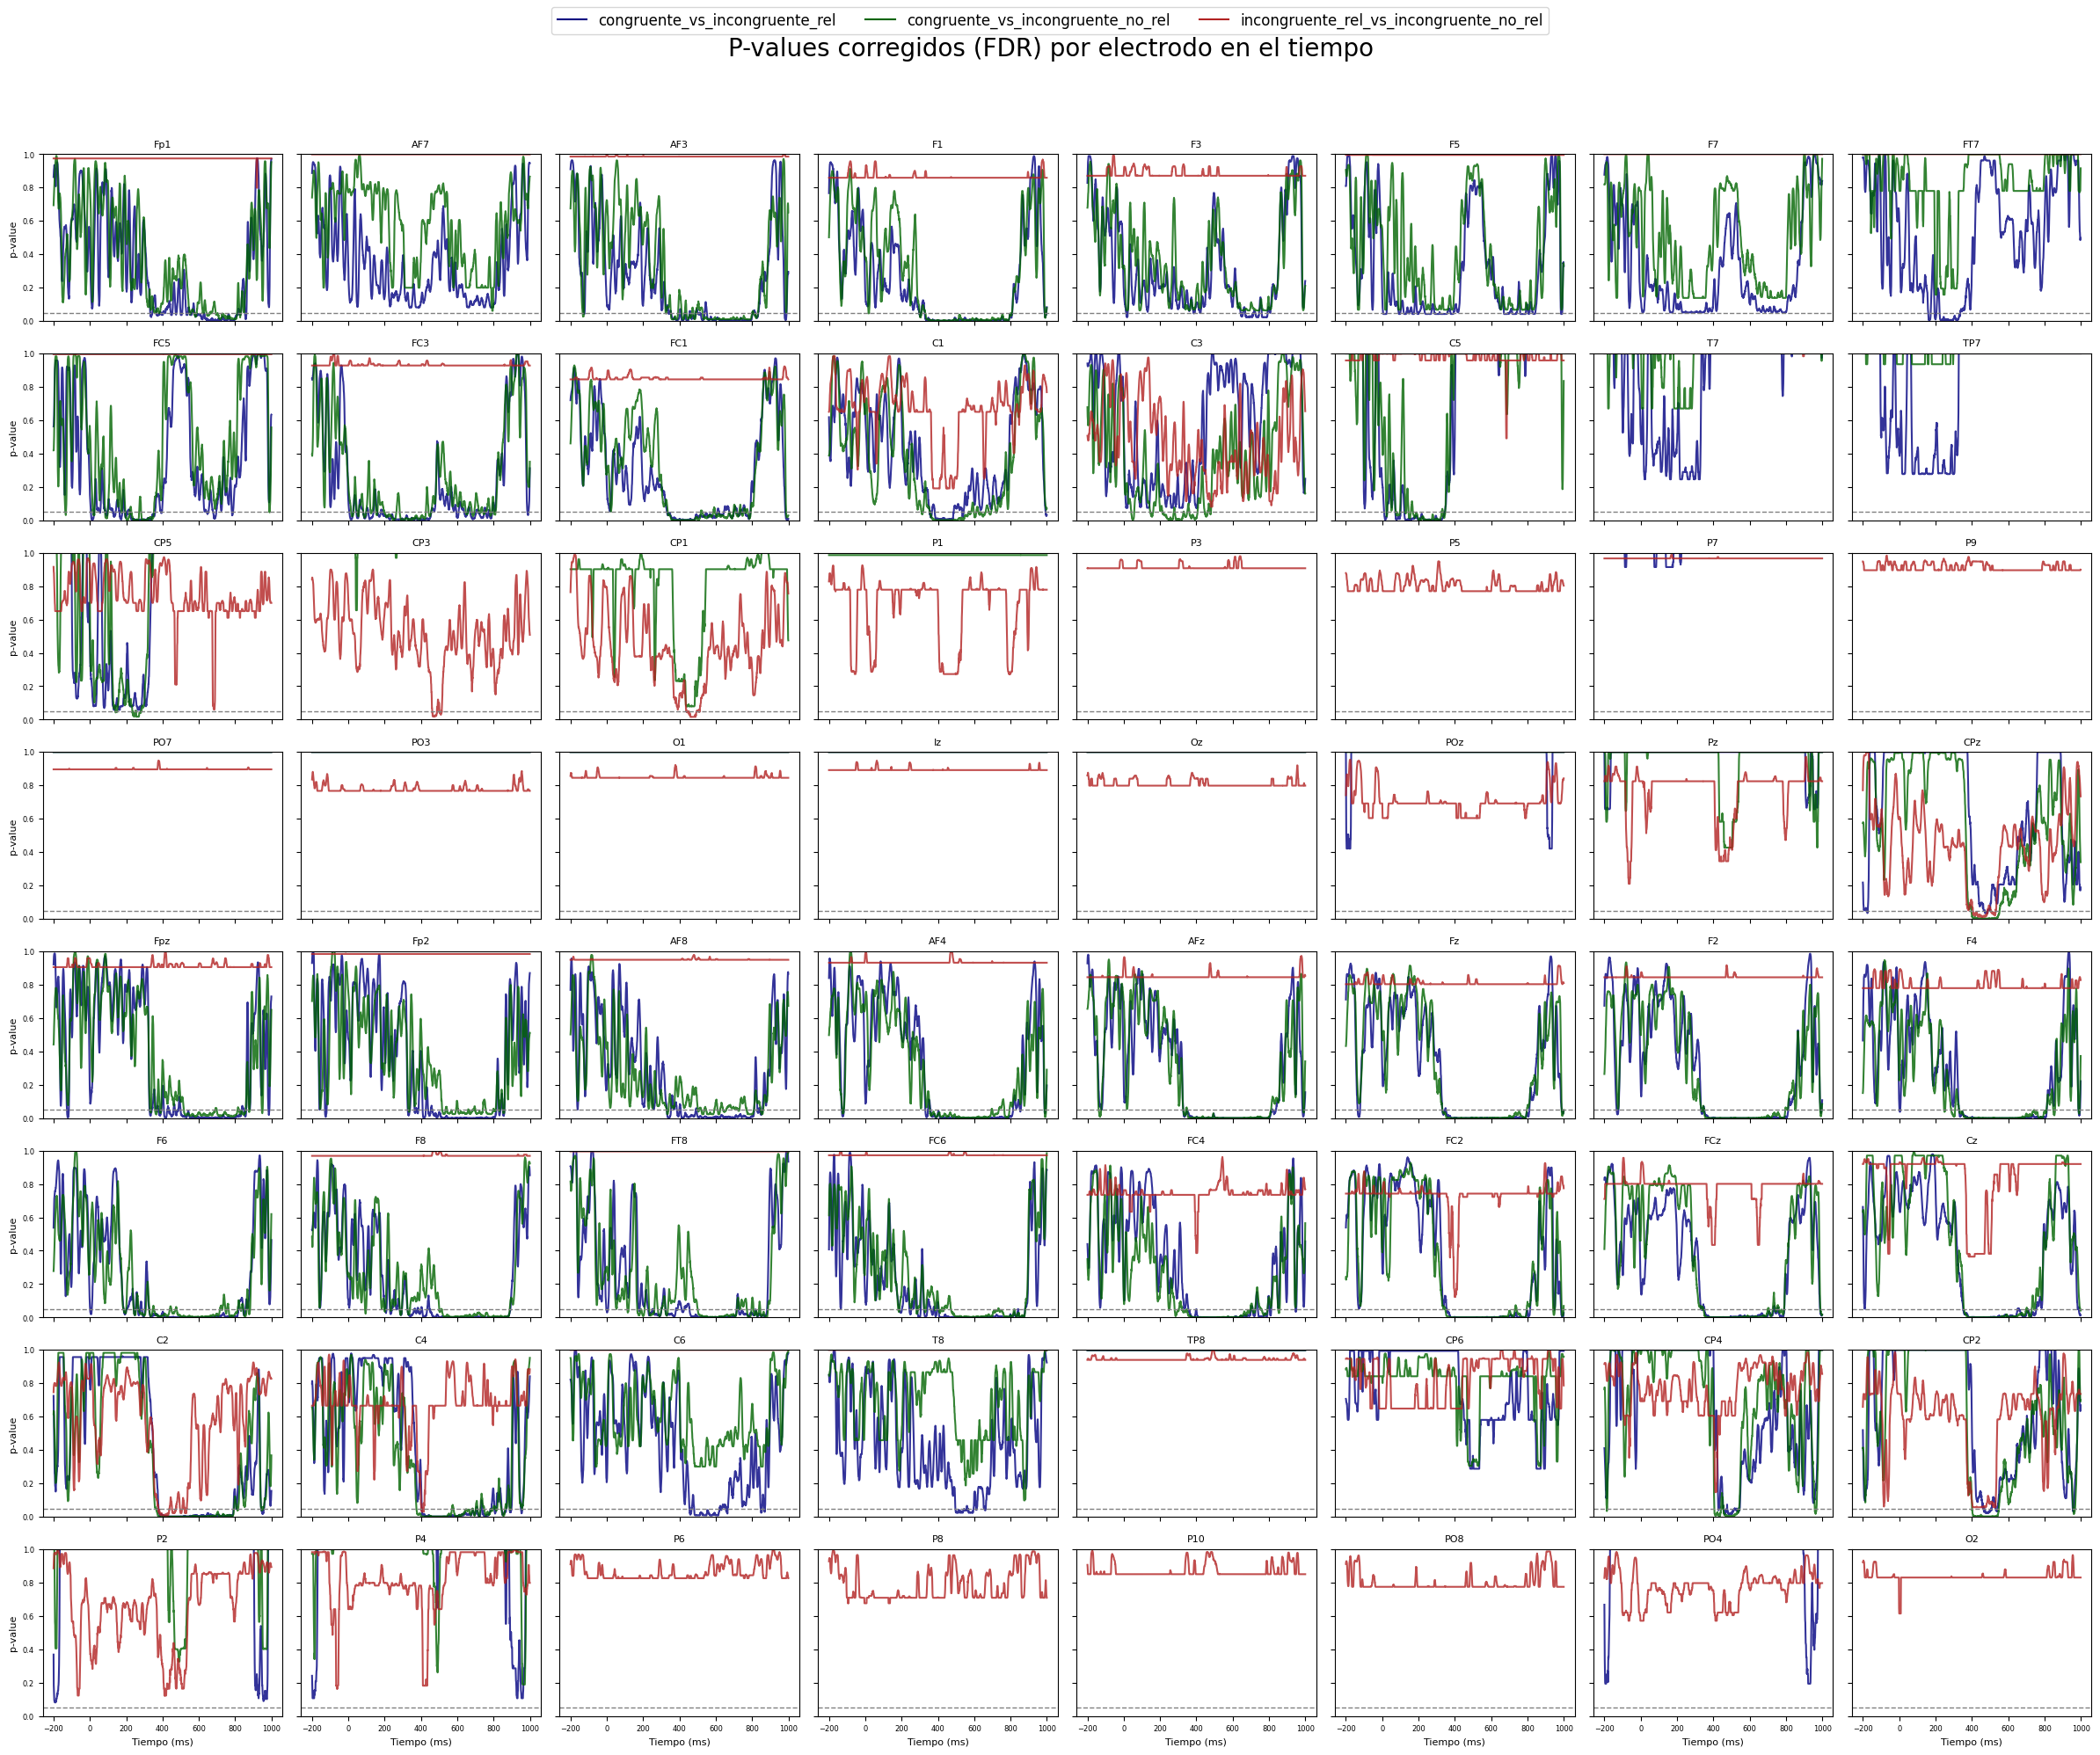

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores personalizada
comparisons_colors = {
    'congruente_vs_incongruente_rel': 'navy',          # Azul
    'congruente_vs_incongruente_no_rel': 'darkgreen',  # Verde
    'incongruente_rel_vs_incongruente_no_rel': 'firebrick'  # Rojo
}

# Configuración temporal
fs = 1024  # Frecuencia de muestreo en Hz
pre_stim_ms = -200  # Pre-estímulo en ms

# Asumimos todas las comparaciones tienen mismo número de muestras
n_muestras = len(next(iter(p_values_fdr.values()))['congruente_vs_incongruente_rel'])
tiempos_ms = np.arange(n_muestras) * (1000 / fs) + pre_stim_ms  # Eje x en milisegundos

# Layout para 64 electrodos
n_electrodes = len(p_values_fdr)
rows, cols = 8, 8
fig, axes = plt.subplots(rows, cols, figsize=(24, 20), sharex=True, sharey=True)
fig.suptitle("P-values corregidos (FDR) por electrodo en el tiempo", fontsize=20)

# Graficar
for idx, (electrode, comps) in enumerate(p_values_fdr.items()):
    row, col = divmod(idx, cols)
    ax = axes[row][col]

    for comparison, pvals in comps.items():
        color = comparisons_colors.get(comparison, 'black')
        ax.plot(tiempos_ms, pvals, label=comparison, color=color, alpha=0.8)

    ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=1)
    ax.set_title(electrode, fontsize=8)
    ax.set_ylim(0, 1)
    ax.tick_params(labelsize=6)

    if row == rows - 1:
        ax.set_xlabel("Tiempo (ms)", fontsize=8)
    if col == 0:
        ax.set_ylabel("p-value", fontsize=8)

# Leyenda global
handles = [plt.Line2D([0], [0], color=c, label=comp) for comp, c in comparisons_colors.items()]
fig.legend(handles=handles, loc='upper center', ncol=3, fontsize=12)

# Guardar
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("figuras/pvalues_fdr_por_electrodo_tiempo.pdf", format='pdf')
fig.savefig("figuras/pvalues_fdr_por_electrodo_tiempo.svg", format='svg')

plt.show()


# LESS

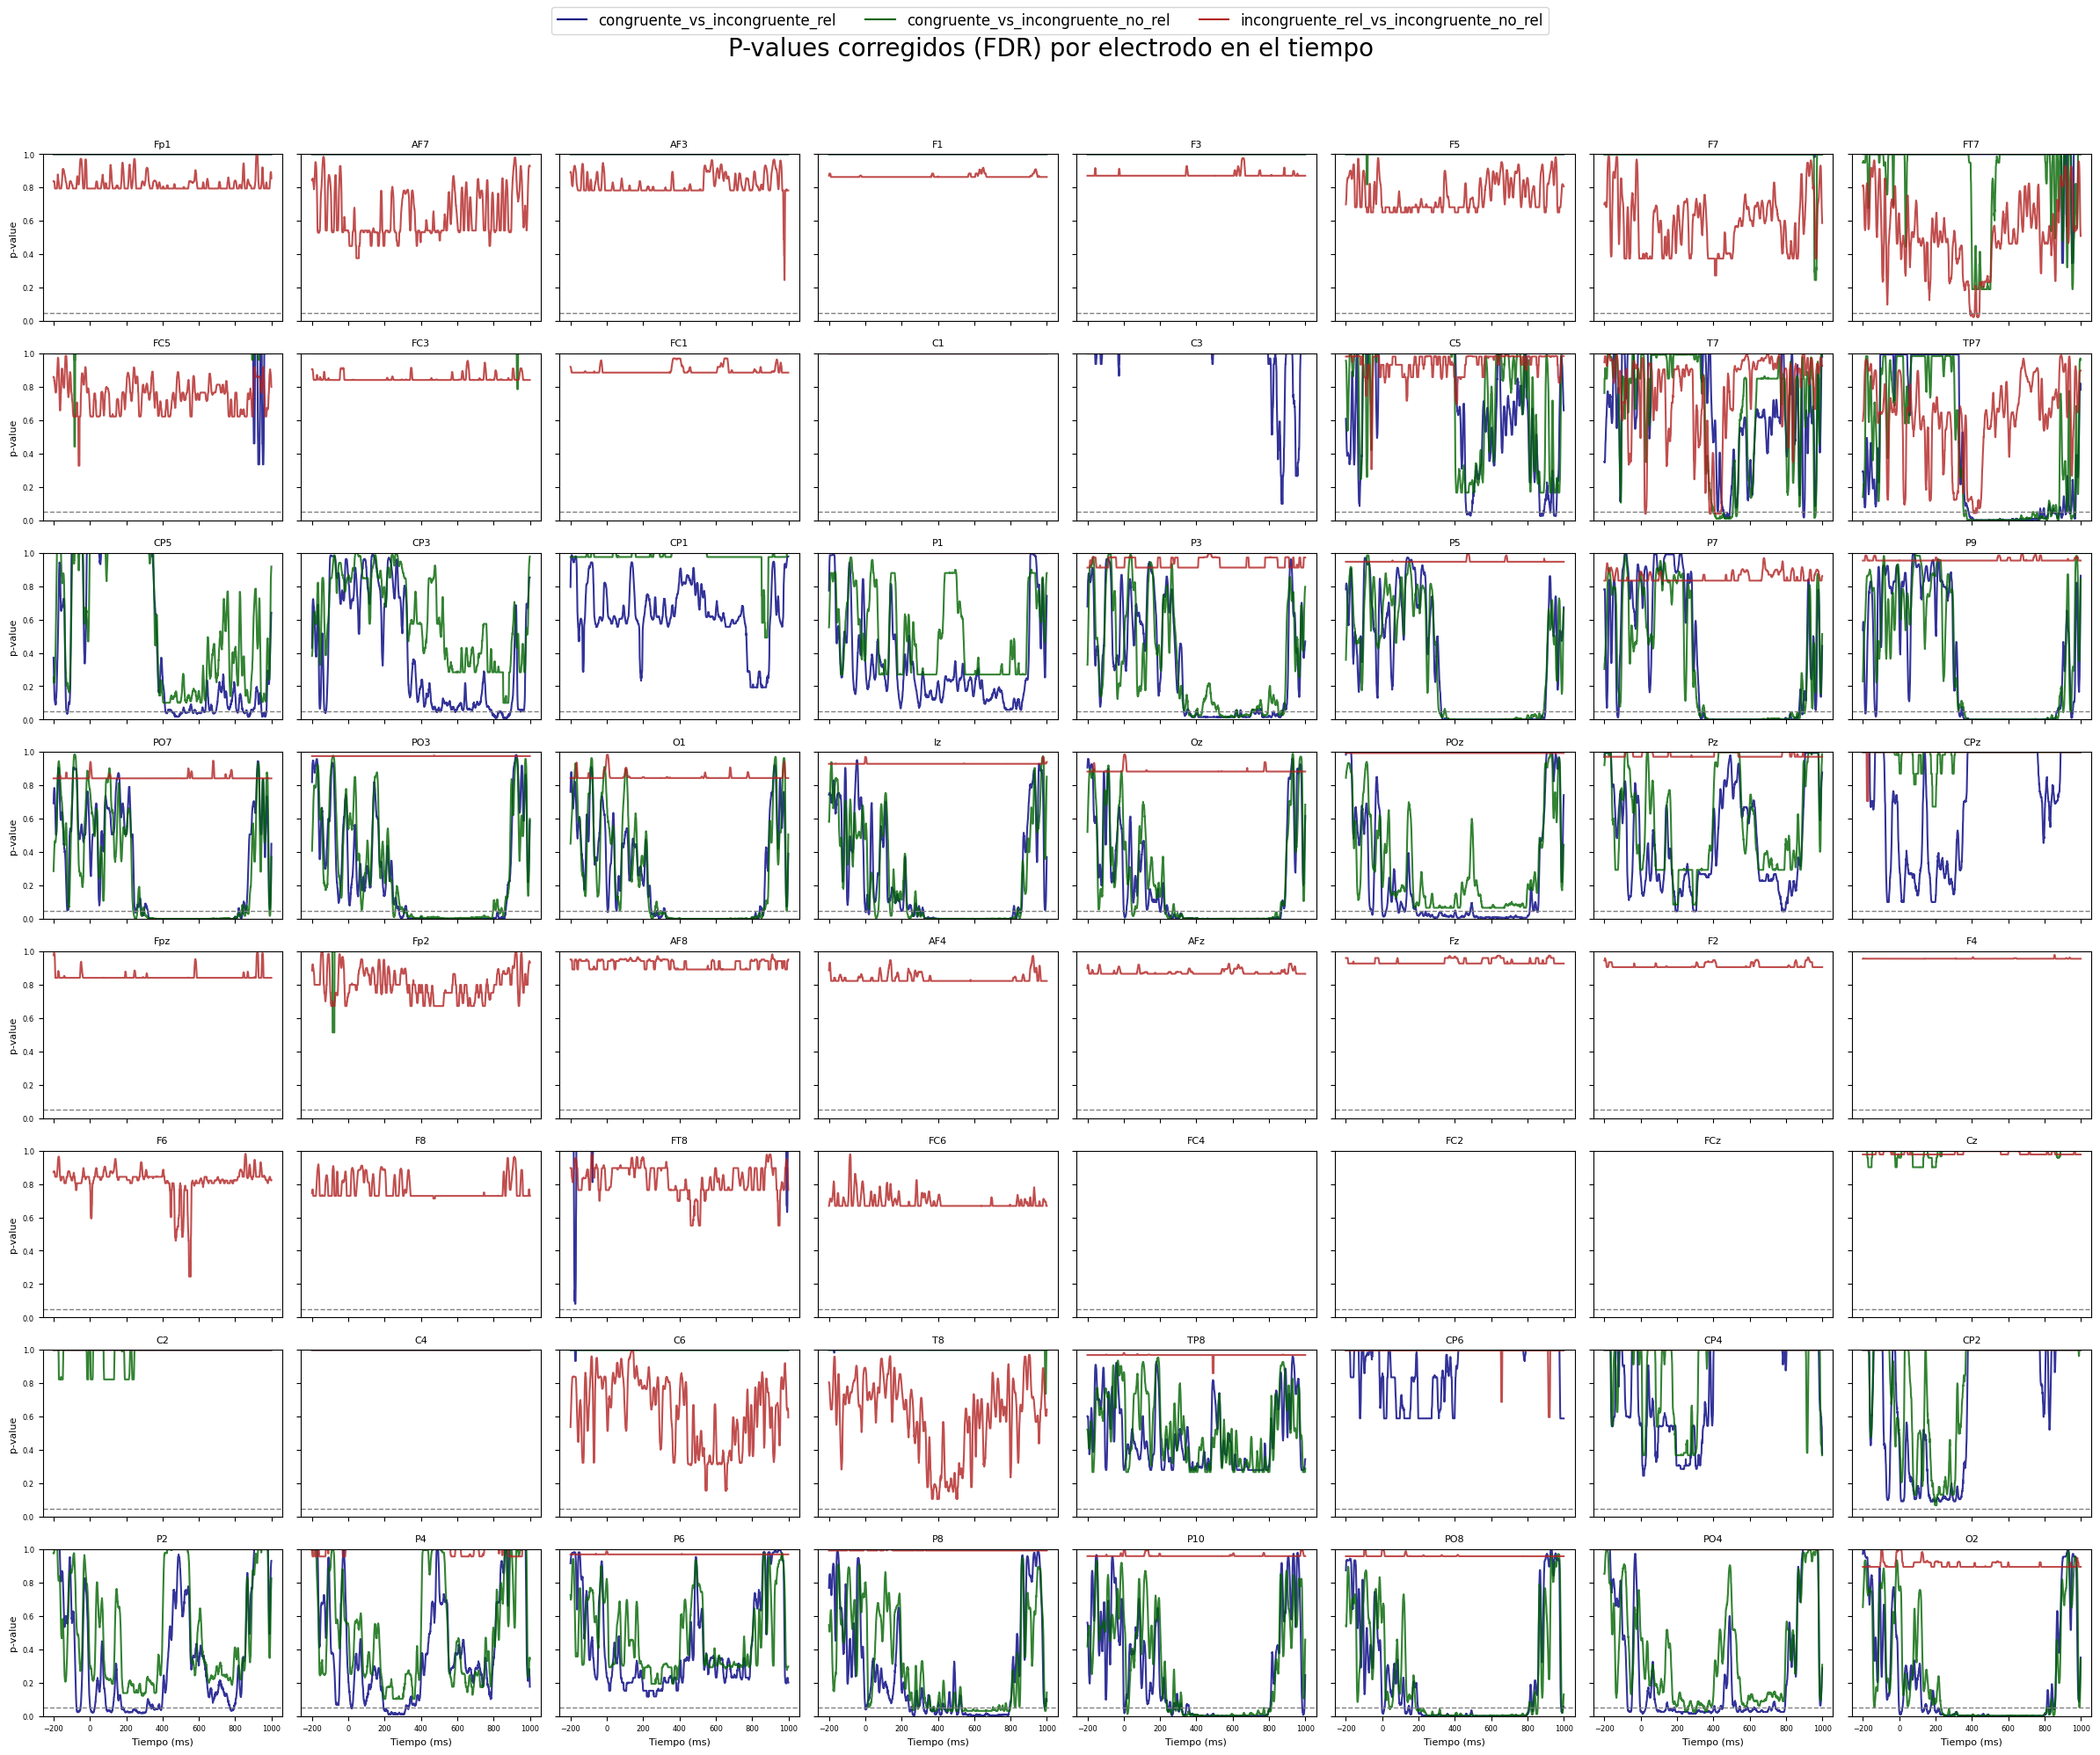

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores personalizada
comparisons_colors = {
    'congruente_vs_incongruente_rel': 'navy',          # Azul
    'congruente_vs_incongruente_no_rel': 'darkgreen',  # Verde
    'incongruente_rel_vs_incongruente_no_rel': 'firebrick'  # Rojo
}

# Configuración temporal
fs = 1024  # Frecuencia de muestreo en Hz
pre_stim_ms = -200  # Pre-estímulo en ms

# Asumimos todas las comparaciones tienen mismo número de muestras
n_muestras = len(next(iter(p_values_fdr.values()))['congruente_vs_incongruente_rel'])
tiempos_ms = np.arange(n_muestras) * (1000 / fs) + pre_stim_ms  # Eje x en milisegundos

# Layout para 64 electrodos
n_electrodes = len(p_values_fdr)
rows, cols = 8, 8
fig, axes = plt.subplots(rows, cols, figsize=(24, 20), sharex=True, sharey=True)
fig.suptitle("P-values corregidos (FDR) por electrodo en el tiempo", fontsize=20)

# Graficar
for idx, (electrode, comps) in enumerate(p_values_fdr.items()):
    row, col = divmod(idx, cols)
    ax = axes[row][col]

    for comparison, pvals in comps.items():
        color = comparisons_colors.get(comparison, 'black')
        ax.plot(tiempos_ms, pvals, label=comparison, color=color, alpha=0.8)

    ax.axhline(y=0.05, color='gray', linestyle='--', linewidth=1)
    ax.set_title(electrode, fontsize=8)
    ax.set_ylim(0, 1)
    ax.tick_params(labelsize=6)

    if row == rows - 1:
        ax.set_xlabel("Tiempo (ms)", fontsize=8)
    if col == 0:
        ax.set_ylabel("p-value", fontsize=8)

# Leyenda global
handles = [plt.Line2D([0], [0], color=c, label=comp) for comp, c in comparisons_colors.items()]
fig.legend(handles=handles, loc='upper center', ncol=3, fontsize=12)

# Guardar
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("figuras/pvalues_fdr_por_electrodo_tiempo.pdf", format='pdf')
fig.savefig("figuras/pvalues_fdr_por_electrodo_tiempo.svg", format='svg')

plt.show()
